<a href="https://colab.research.google.com/github/braiancalot/machine-learning/blob/main/C%C3%B3pia_de_Trabalho_IA_C3_Braian_dos_Santos_Calot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligência Artificial - Trabalho C3**

Aluno: **Braian dos Santos Calot**

Data: **30/11/2021**





# Introdução

Este trabalho se propõe a testar duas formas de se trabalhar com *Machine Learning* em um *dataset*:
- A primeira é ignorar uma das colunas, ( 'salary' ), que tem atributos nulos, e utilizar o modelo *LightGBM* para classificar o atributo 'status' entre 'Placed e 'Not Placed' para cada pessoa.
- Do mesmo modo do anterior, o objetivo da segunda maneira é prever o atributo 'status' utilizando o *LightGBM*, mas dessa vez será considerado o atributo 'salary' e será utilizado o modelo de Regressão Linear Múltipla para prever os salários que originalmente são nulos.

Será utilizado precisão, recall, AUC e ROC como métricas para avaliar o resultado.

# Preparação do 1º Dataset ( *'df_no_salary'* )

In [ ]:
# Carregando dataset
import pandas as pd

df_original = pd.read_csv('https://raw.githubusercontent.com/braiancalot/dataset/main/Placement_Data_Full_Class.csv')

# Mostrando dataset
df_original

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
# Copiando o dataset original
df_no_salary = df_original.copy()

# Removendo atributo 'salary' do dataset 'df_no_salary'
df_no_salary.drop('salary', axis = 1, inplace = True)

# Mostrando dataset
df_no_salary

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [ ]:
# Aplicando o LabelEnconder
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df_no_salary.gender = le.fit_transform(df_no_salary.gender)
df_no_salary.ssc_b = le.fit_transform(df_no_salary.ssc_b)
df_no_salary.hsc_b = le.fit_transform(df_no_salary.hsc_b)
df_no_salary.hsc_s = le.fit_transform(df_no_salary.hsc_s)
df_no_salary.degree_t = le.fit_transform(df_no_salary.degree_t)
df_no_salary.workex = le.fit_transform(df_no_salary.workex)
df_no_salary.specialisation = le.fit_transform(df_no_salary.specialisation)
df_no_salary.status = le.fit_transform(df_no_salary.status)

# Mostrando dataset
df_no_salary

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [ ]:
# Separando coluna que será prevista do resto do dataset
y = df_no_salary.pop("status")
X = df_no_salary

In [ ]:
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state=20)

# Executando algoritmo de *Machine Learning* (*LightGBM*)

In [ ]:
# Treino e teste do algoritmo
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

# Mostrando valores previstos para 'status'
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1])

# Avaliação

In [ ]:
# Precisão e Recall
from sklearn import metrics

print("Precisão: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Precisão:  0.8613861386138614
Recall:  0.8285714285714286


In [ ]:
# ROC e AUC
from sklearn.metrics import roc_curve, auc

y_pred_prob = lgbm.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]

fpr1, tpr1, thresold1 = roc_curve(y_test, y_pred_prob)
auc1 = auc(fpr1, tpr1)

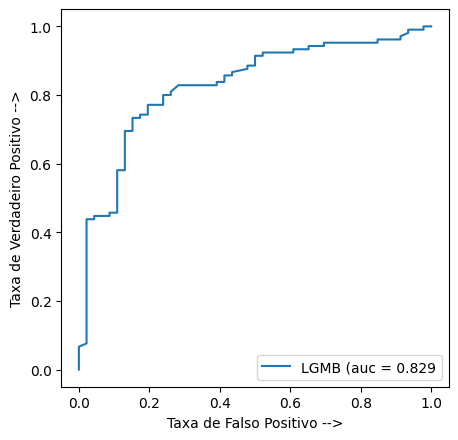

In [ ]:
# Exibindo gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr1, tpr1, linestyle='-', label='LGMB (auc = %0.3f'%auc1)
plt.xlabel('Taxa de Falso Positivo -->')
plt.ylabel('Taxa de Verdadeiro Positivo -->')
plt.legend(loc="lower right")
plt.show()

# Comentários sobre a avaliação

Levando em conta que 'Placed' = Positivo e 'Not placed' = Negativo, e sem levar em conta o atributo 'salário', o algoritmo *LightGBM* obteve:
- **86,13%** de **Precisão**, ou seja, dos positivos encontrados, **86,13%** eram positivos de fato.
- **82,85%** de **Recall**, ou seja, de todos os positivos existente, o algoritmo encontrou **82,85%** deles.

- Sobre a **ROC** e **AUC**: O Ideal seria uma curva ROC que passasse o mais próximo do ponto superior esquerdo possível, o que significaria que o modelo teve 100% de **verdadeiros positivos**, 0% de **falsos positivos** e um **AUC** de 1. É possível visualizar na célula acima, a curva **ROC** obtida pelo *LightGBM* que obteve um **AUC** de **0.829**.


  






# Preparação do 2º Dataset ( *'df_no_status'* )

In [ ]:
# copiando o dataset original
df_no_status = df_original.copy()

# removendo atributo 'status' do dataset 'df_no_status'
df_no_status.drop('status', axis = 1, inplace = True)

# Mostrando dataset
df_no_status

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0


In [ ]:
# aplicando o LabelEnconder

df_no_status.gender = le.fit_transform(df_no_status.gender)
df_no_status.ssc_b = le.fit_transform(df_no_status.ssc_b)
df_no_status.hsc_b = le.fit_transform(df_no_status.hsc_b)
df_no_status.hsc_s = le.fit_transform(df_no_status.hsc_s)
df_no_status.degree_t = le.fit_transform(df_no_status.degree_t)
df_no_status.workex = le.fit_transform(df_no_status.workex)
df_no_status.specialisation = le.fit_transform(df_no_status.specialisation)

# Mostrando dataset
df_no_status

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,204000.0


In [ ]:
# Copiando linhas com 'salary' == 'NaN'
df_no_status_salary_null = df_no_status[df_no_status['salary'].isnull()]

# Mostrando dataset como todos os 'salary' == 'NaN'
df_no_status_salary_null

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
3,4,1,56.0,0,52.0,0,2,52.00,2,0,66.00,1,59.43,NaN
5,6,1,55.0,1,49.8,1,2,67.25,2,1,55.00,0,51.58,NaN
6,7,0,46.0,1,49.2,1,1,79.00,0,0,74.28,0,53.29,NaN
9,10,1,58.0,0,70.0,0,1,61.00,0,0,54.00,0,52.21,NaN
12,13,0,47.0,0,55.0,1,2,65.00,0,0,62.00,1,65.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,0,67.0,0,70.0,0,1,65.00,1,0,88.00,1,71.96,NaN
201,202,1,54.2,0,63.0,1,2,58.00,0,0,79.00,1,58.44,NaN
206,207,1,41.0,0,42.0,0,2,60.00,0,0,97.00,0,53.39,NaN
208,209,0,43.0,0,60.0,1,2,65.00,0,0,92.66,1,62.92,NaN


In [ ]:
# Removendo linhas com 'salary' == 'NaN' do df_no_status
df_no_status = df_no_status.drop(df_no_status_salary_null.index)

# Mostrando dataset sem as linhas com 'salary' == 'NaN'
df_no_status

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0
7,8,1,82.00,0,64.00,0,2,66.00,2,1,67.0,0,62.14,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1,62.00,0,72.00,0,1,65.00,0,0,67.0,0,56.49,216000.0
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,295000.0


In [ ]:
# Divisão da coluna que será prevista (salary) do resto do dataset
df_no_status_temp = df_no_status.copy()
y = df_no_status_temp.pop("salary")
X = df_no_status_temp

In [ ]:
# Divisão dos dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state=20)

# Executando algoritmo de Regressão Linear

In [ ]:
# Regressão Linear Múltipla
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Treinando o Modelo
lr.fit(X_train, y_train)

In [ ]:
# Removendo a coluna 'salary' das linhas que possuiam o 'salary' == 'NaN'
df_no_status_salary_null.pop('salary')
# 'df_no_status_salary_null' será usado para o modelo prever os valores de 'salary' que originalmente eram nulos 
 
# Mostrando o dataset que será usado pelo modelo
df_no_status_salary_null

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
3,4,1,56.0,0,52.0,0,2,52.00,2,0,66.00,1,59.43
5,6,1,55.0,1,49.8,1,2,67.25,2,1,55.00,0,51.58
6,7,0,46.0,1,49.2,1,1,79.00,0,0,74.28,0,53.29
9,10,1,58.0,0,70.0,0,1,61.00,0,0,54.00,0,52.21
12,13,0,47.0,0,55.0,1,2,65.00,0,0,62.00,1,65.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,0,67.0,0,70.0,0,1,65.00,1,0,88.00,1,71.96
201,202,1,54.2,0,63.0,1,2,58.00,0,0,79.00,1,58.44
206,207,1,41.0,0,42.0,0,2,60.00,0,0,97.00,0,53.39
208,209,0,43.0,0,60.0,1,2,65.00,0,0,92.66,1,62.92


In [ ]:
# Prevendo valores de 'salary'
salary_pred = lr.predict(df_no_status_salary_null)

# Mostrando os valores previstos
salary_pred

array([345150.0666318 , 298159.28561854, 275222.70718514, 356010.32240991,
       338732.27253538, 270923.23601387, 409621.74831332, 280432.49326004,
       427502.83837499, 365885.84646268, 225221.08165006, 298831.37389589,
       346363.44029664, 210570.38349369, 331108.25912428, 222959.05571874,
       289113.09944736, 184650.52462047, 350139.32609702, 338687.47376112,
       266991.59889687, 315745.63457677, 165380.67367339, 255936.922176  ,
       299240.18389363, 368203.36469814, 318266.98345309, 368851.81352232,
       342634.40064798, 373830.48036637, 409184.16095258, 317376.81904166,
       334174.91303157, 397583.97322644, 354795.08731281, 310014.65260245,
       261778.25114869, 412731.53162451, 391446.89172065, 318446.73214481,
       303099.2249525 , 343308.13645033, 358212.63297324, 341574.52812754,
       294601.76306233, 268395.88643311, 419579.31970694, 397257.15401059,
       304494.77766135, 256519.90518224, 271731.82295246, 296617.89713928,
       302033.12618381, 2

In [ ]:
# Adicionando os valores previstos ao dataset em que a coluna 'salary' havia sido removida
df_no_status_salary_null['salary'] = salary_pred

# Mostrando o dataset
df_no_status_salary_null

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
3,4,1,56.0,0,52.0,0,2,52.00,2,0,66.00,1,59.43,345150.066632
5,6,1,55.0,1,49.8,1,2,67.25,2,1,55.00,0,51.58,298159.285619
6,7,0,46.0,1,49.2,1,1,79.00,0,0,74.28,0,53.29,275222.707185
9,10,1,58.0,0,70.0,0,1,61.00,0,0,54.00,0,52.21,356010.322410
12,13,0,47.0,0,55.0,1,2,65.00,0,0,62.00,1,65.04,338732.272535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,0,67.0,0,70.0,0,1,65.00,1,0,88.00,1,71.96,338582.286870
201,202,1,54.2,0,63.0,1,2,58.00,0,0,79.00,1,58.44,369060.161339
206,207,1,41.0,0,42.0,0,2,60.00,0,0,97.00,0,53.39,475255.283644
208,209,0,43.0,0,60.0,1,2,65.00,0,0,92.66,1,62.92,407611.952023


In [ ]:
# Arredondando a coluna 'salary' 
df_no_status_salary_null['salary'] = df_no_status_salary_null['salary'].round(0)

# Mostrando o dataset
df_no_status_salary_null

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
3,4,1,56.0,0,52.0,0,2,52.00,2,0,66.00,1,59.43,345150.0
5,6,1,55.0,1,49.8,1,2,67.25,2,1,55.00,0,51.58,298159.0
6,7,0,46.0,1,49.2,1,1,79.00,0,0,74.28,0,53.29,275223.0
9,10,1,58.0,0,70.0,0,1,61.00,0,0,54.00,0,52.21,356010.0
12,13,0,47.0,0,55.0,1,2,65.00,0,0,62.00,1,65.04,338732.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,0,67.0,0,70.0,0,1,65.00,1,0,88.00,1,71.96,338582.0
201,202,1,54.2,0,63.0,1,2,58.00,0,0,79.00,1,58.44,369060.0
206,207,1,41.0,0,42.0,0,2,60.00,0,0,97.00,0,53.39,475255.0
208,209,0,43.0,0,60.0,1,2,65.00,0,0,92.66,1,62.92,407612.0


# Voltando ao 'df_no_status'

In [ ]:
# Mostrando o dataset
df_no_status

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0
7,8,1,82.00,0,64.00,0,2,66.00,2,1,67.0,0,62.14,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1,62.00,0,72.00,0,1,65.00,0,0,67.0,0,56.49,216000.0
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,295000.0


In [ ]:
# Adicionando as linhas com o 'salary' previsto pelo modelo de Regressão Linear
df_no_status = df_no_status.append(df_no_status_salary_null)

# Mostrando o dataset
df_no_status

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.00,1,58.80,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.50,0,66.28,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.00,0,57.80,250000.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.80,0,55.50,425000.0
7,8,1,82.00,0,64.00,0,2,66.00,2,1,67.00,0,62.14,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,0,67.00,0,70.00,0,1,65.00,1,0,88.00,1,71.96,338582.0
201,202,1,54.20,0,63.00,1,2,58.00,0,0,79.00,1,58.44,369060.0
206,207,1,41.00,0,42.00,0,2,60.00,0,0,97.00,0,53.39,475255.0
208,209,0,43.00,0,60.00,1,2,65.00,0,0,92.66,1,62.92,407612.0


In [ ]:
# Ordenando pelo índice
df_no_status = df_no_status.sort_index()

# Mostrando o dataset
df_no_status

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,345150.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,204000.0


# Preparação do 3º Dataset ( *'df_original'* )

In [ ]:
# Removendo coluna 'salary'
df_original.pop('salary')

# Mostrando dataset
df_original

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [ ]:
# Adicionado a coluna 'salary' prevista pelo modelo de Regressão Linear
df_original['salary'] = df_no_status['salary']

# Mostrando dataset
df_original

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,345150.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
# aplicando o LabelEnconder

df_original.gender = le.fit_transform(df_original.gender)
df_original.ssc_b = le.fit_transform(df_original.ssc_b)
df_original.hsc_b = le.fit_transform(df_original.hsc_b)
df_original.hsc_s = le.fit_transform(df_original.hsc_s)
df_original.degree_t = le.fit_transform(df_original.degree_t)
df_original.workex = le.fit_transform(df_original.workex)
df_original.specialisation = le.fit_transform(df_original.specialisation)
df_original.status = le.fit_transform(df_original.status)

df_original

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,345150.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
# Separação da coluna 'status' do resto do dataset
y = df_original.pop('status')
X = df_original

In [ ]:
# Divisão dos dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state=20)

# Executando algoritmo de Machine Learning (LightGBM)

In [ ]:
# Treino e teste do algoritmo
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

#Mostrando valores de 'status' previstos
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

# Avaliação

In [ ]:
#Precisão e Recall
print("Precisão: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Precisão:  0.8942307692307693
Recall:  0.8857142857142857


In [ ]:
# Roc e AUC
y_pred_prob = lgbm.predict_proba(X_test)
y_pred_prob

y_pred_prob = y_pred_prob[:, 1]
y_pred_prob

fpr2, tpr2, thresold2 = roc_curve(y_test, y_pred_prob)
auc2 = auc(fpr2, tpr2)

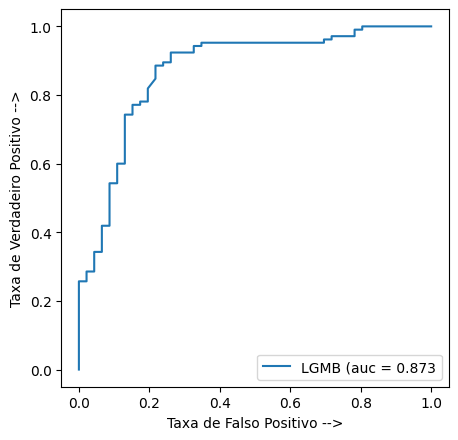

In [ ]:
# Exibindo gráfico

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr2, tpr2, linestyle='-', label='LGMB (auc = %0.3f'%auc2)
plt.xlabel('Taxa de Falso Positivo -->')
plt.ylabel('Taxa de Verdadeiro Positivo -->')
plt.legend(loc="lower right")
plt.show()

# Comentários sobre a Avaliação

Levando em conta que 'Placed' = Positivo e 'Not placed' = Negativo, e levando em conta o atributo 'salário', o algoritmo *LightGBM* obteve:
- **89,42%** de **Precisão**, ou seja, dos positivos encontrados, **89,42%** eram positivos de fato.
- **88,57%** de **Recall**, ou seja, de todos os positivos existente, o algoritmo encontrou **88,57%** deles.

- Sobre a **ROC** e **AUC**: É possível visualizar na célula acima, a curva **ROC** obtida pelo *LightGBM* que teve um **AUC** de **0.873**.

# Conclusão

Considerando: 
- 1: LGBM aplicado ao dataset ignorando o atributo salário.
- 2: LGBM aplicado ao dataset considerando o atributo salário após utilizar a Regressão Linear Múltipla para prever o salários que originalmente estavam nulos.

Os resultados obtidos foram:

- Precisão 1: **86,13%** | Recall 1: **82,85%**

- Precisão 2: **88,57%** | Recall 2: **88,57%**

- ROC e AUC:





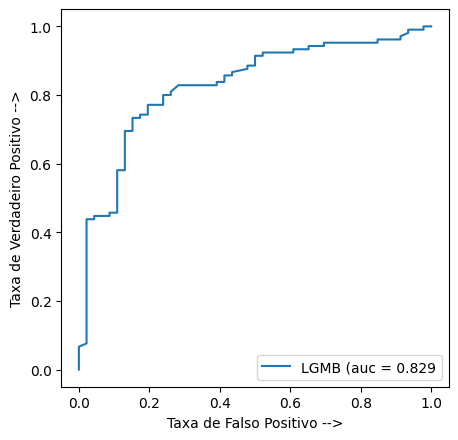

In [ ]:
# Exibindo gráfico 1
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr1, tpr1, linestyle='-', label='LGMB (auc = %0.3f'%auc1)
plt.xlabel('Taxa de Falso Positivo -->')
plt.ylabel('Taxa de Verdadeiro Positivo -->')
plt.legend(loc="lower right")
plt.show()

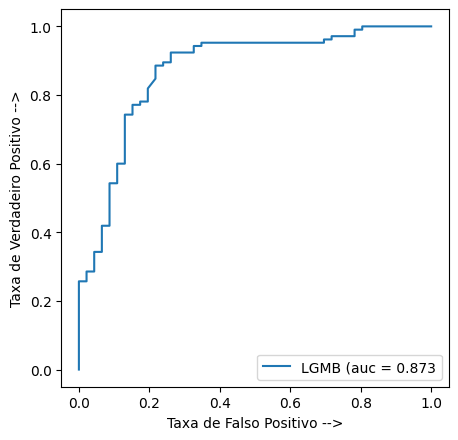

In [ ]:
# Exibindo gráfico 2

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr2, tpr2, linestyle='-', label='LGMB (auc = %0.3f'%auc2)
plt.xlabel('Taxa de Falso Positivo -->')
plt.ylabel('Taxa de Verdadeiro Positivo -->')
plt.legend(loc="lower right")
plt.show()

A Curva ROC de 2 é ligeiramente melhor que de 1, logo a AUC também é (AUC 1 = 0.829 e AUC 2 = 0.873).

Levando em conta os resultado apresentados, é possível chegar a conclusão de que: **ao utilizar o atributo salário, estimando os salários nulos com regressão linear, o modelo de machine learning obteve melhores resultados do que apenas ignorar o atributo salário do dataset.**

# Referências

https://scikit-learn.org/stable/user_guide.html

https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

https://pt.stackoverflow.com/questions/385478/remover-linhas-de-um-dataframe-que-atendem-a-certa-condição

https://pt.stackoverflow.com/questions/373395/dataframe-pandas-criando-nova-coluna-após-comparação-entre-colunas

https://thispointer.com/python-pandas-how-to-add-new-columns-in-a-dataframe-using-or-dataframe-assign/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

https://thispointer.com/python-pandas-how-to-add-rows-in-a-dataframe-using-dataframe-append-loc-iloc/

https://www.dataindependent.com/pandas/pandas-append/

https://www.alura.com.br/artigos/como-remover-linhas-e-colunas-no-pandas

[PREVENDO ESGOTAMENTO EM FUNCIONÁRIOS - BURNOUT - COM CIÊNCIA DE DADOS](https://www.youtube.com/watch?v=SPaJ6knP3Wo)

[Machine Learning em Python](https://www.youtube.com/playlist?list=PL5TJqBvpXQv5CBxLkdqmou_86syFK7U3Q)

[COMPARANDO 9 ALGORITMOS DE MACHINE LEARNING](https://www.youtube.com/watch?v=SPaJ6knP3Wo)

[Machine Learning with Scikit-Learn Python | ROC & AUC](https://www.youtube.com/watch?v=TEkvKx2tQHU)

[Interpretando os resultados do seu modelo | Matriz de confusão, ROC curve e AUC](https://www.youtube.com/watch?v=YBZHJANH5jY)

[AM 03.3 Precisão e Recall (Aprendizagem de Máquina)](https://www.youtube.com/watch?v=oHxxJQdd7fU)

[Avaliação de Modelos Preditivos: Métricas (acurácia, precision e recall)](https://www.youtube.com/watch?v=SRgZhZRKwqY)

[Machine Learning | Hands-On](https://www.youtube.com/playlist?list=PLBY1_yYE5PTayGHhtnd8QUEsbYh6-UmP2)

[APRENDA DE VEZ O QUE É E COMO USAR A MÉTRICA AUC_ROC - MACHINE LEARNING](https://www.youtube.com/watch?v=5-XvpQOlesk)

[Determinando a temperatura em função de diversas variáveis usando regressão multilinear no Python](https://www.youtube.com/watch?v=-QKL_Jpwdnc)